## Assignment: predicting house prices

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

* Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

```python
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
```

* Please follow the example above and call `engine.dispose()` when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.






### Load the dataset from the Thinkful PostgreSQL database. 


In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

### Investigate the data, and do any necessary data cleaning

In [256]:
houses_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


All null values are in yellow


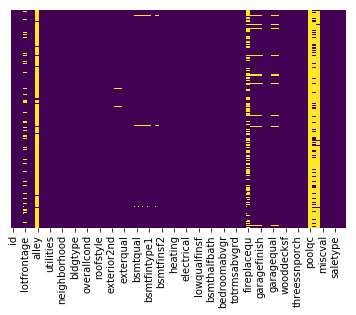

In [257]:
print('All null values are in yellow')
sns.heatmap(houses_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [258]:
#Identifying columns with a lot of null values

x = (houses_df.isnull().sum()*100)/houses_df.saleprice.count()
columnstoRemove = []
columnstoConsider = []

for value,column in zip(x,x.index):
    
    if value >= 20:       
        print('Column {} with HIGH {}%  of null values'.format(column,round(value,2)))
        columnstoRemove.append(column)
    elif 0 < value < 20:
        print('Column {} with low {}%  of null values'.format(column,round(value,2)))
        columnstoConsider.append(column)
    
    
print('Columns to be removed from dataset:',columnstoRemove)
print('Columns with a few null values to be removed:',columnstoConsider)


Column lotfrontage with low 17.74%  of null values
Column alley with HIGH 93.77%  of null values
Column masvnrtype with low 0.55%  of null values
Column masvnrarea with low 0.55%  of null values
Column bsmtqual with low 2.53%  of null values
Column bsmtcond with low 2.53%  of null values
Column bsmtexposure with low 2.6%  of null values
Column bsmtfintype1 with low 2.53%  of null values
Column bsmtfintype2 with low 2.6%  of null values
Column electrical with low 0.07%  of null values
Column fireplacequ with HIGH 47.26%  of null values
Column garagetype with low 5.55%  of null values
Column garageyrblt with low 5.55%  of null values
Column garagefinish with low 5.55%  of null values
Column garagequal with low 5.55%  of null values
Column garagecond with low 5.55%  of null values
Column poolqc with HIGH 99.52%  of null values
Column fence with HIGH 80.75%  of null values
Column miscfeature with HIGH 96.3%  of null values
Columns to be removed from dataset: ['alley', 'fireplacequ', 'poolq

In [242]:
#Dropping columns from dataset

#Running just once 
#Uncomment this line
#houses_df=houses_df.drop(columnstoRemove,axis=1)


#I'll analyze these variables later: 'garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond'
#meanwhile I'll remove those columns from columnstoConsider list

#Uncomment this line
#for i in ['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']:
#    columnstoConsider.remove(i)

#Dropping rows with null values from columns with low percentage of null values

#Uncomment this line
#houses_df = houses_df.dropna(subset=columnstoConsider)

houses_df[['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']]

,garagetype,garageyrblt,garagefinish,garagequal,garagecond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
5,Attchd,1993.0,Unf,TA,TA
6,Attchd,2004.0,RFn,TA,TA
7,Attchd,1973.0,RFn,TA,TA
8,Detchd,1931.0,Unf,Fa,TA
9,Attchd,1939.0,RFn,Gd,TA


All null values are in yellow


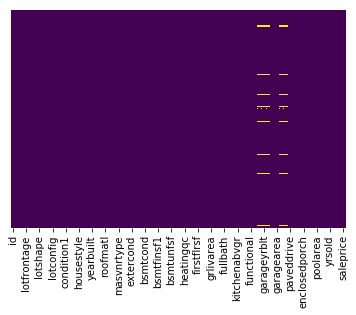

In [56]:
print('All null values are in yellow')
sns.heatmap(houses_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Explore the data and find some variables that you think would be useful in predicting house prices

In [259]:
#Getting list of categorical and noncategorical features

nonCategorical = []
categorical = []

for column in houses_df.columns:
    if len(houses_df[column].unique()) < 20:
        categorical.append(column)
    else:
        nonCategorical.append(column)
        


In [260]:
#Verifying lists

houses_df.neighborhood.unique()

#categorical.append('neighborhood')
#nonCategorical.remove('neighborhood')


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

yearbuilt 0.5228973328794967
yearremodadd 0.5071009671113867
totalbsmtsf 0.6135805515591944
firstflrsf 0.6058521846919166
grlivarea 0.7086244776126511
garageyrblt 0.48636167748786213
garagearea 0.6234314389183598
saleprice 1.0


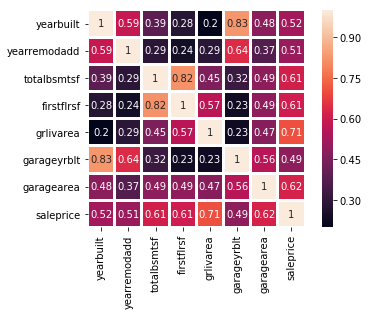

In [261]:
#Detecting correlation

correlation = houses_df[nonCategorical].corr()
#print(correlation['saleprice'])
x=correlation['saleprice']
new_nonCategorical = []

for index,value in zip(x.index,x):
    if (value >= 0.48) or (value <= -0.48):
        print(index,value)
        new_nonCategorical.append(index)


#Creating a newdataframe

new_houses = houses_df[new_nonCategorical]

correlation_2 = houses_df[new_nonCategorical].corr()
sns.heatmap(correlation_2, square=True, annot=True, linewidths=2)


In [262]:
new_houses.corr()


saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605

SyntaxError: invalid syntax (<ipython-input-262-2c0ad75a76fe>, line 4)

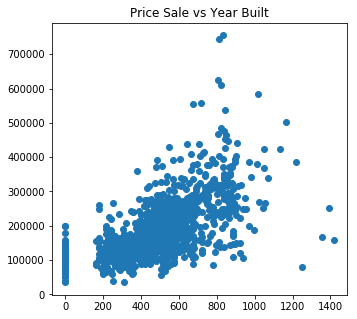

In [263]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,3)
plt.scatter(new_houses['garagearea'],new_houses['saleprice'])
plt.title("Price Sale vs Year Built")

plt.show()

#Seaborn scatter regression plot 

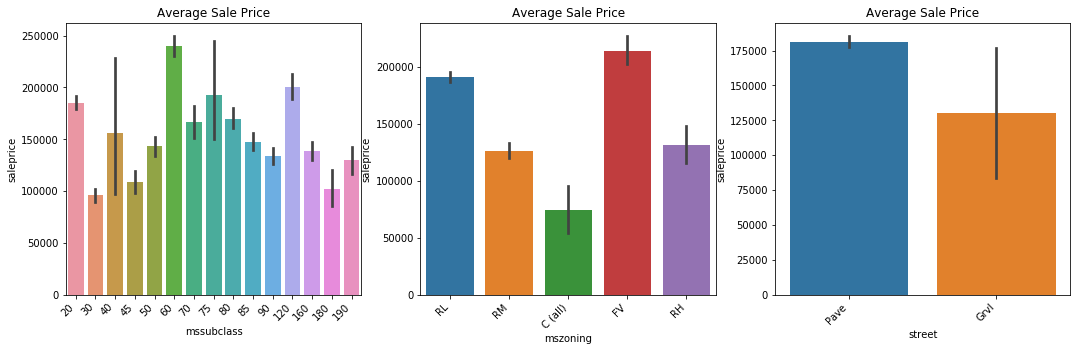

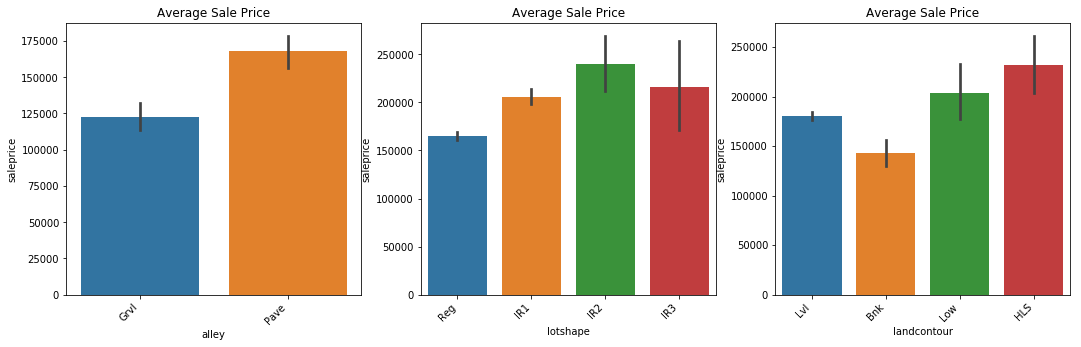

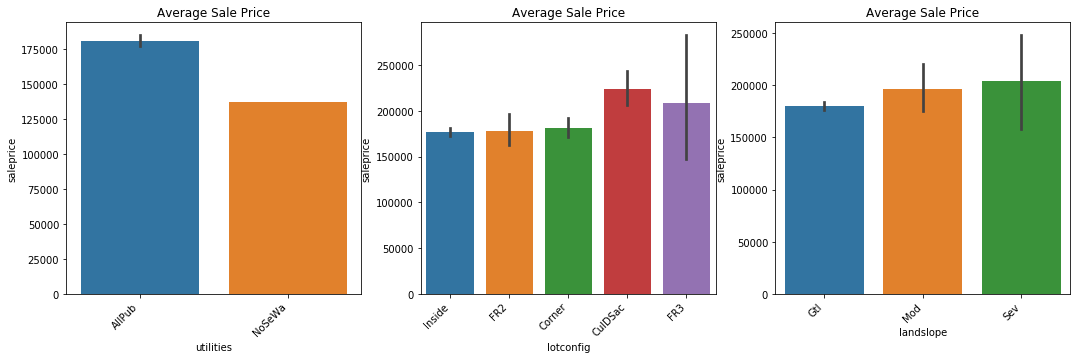

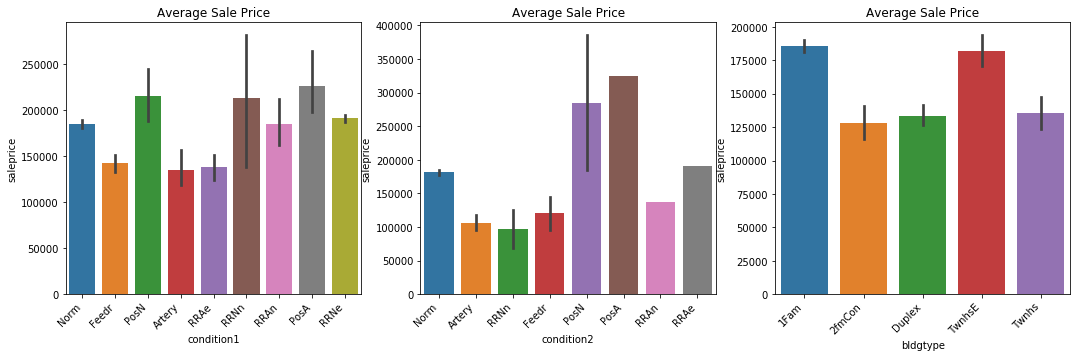

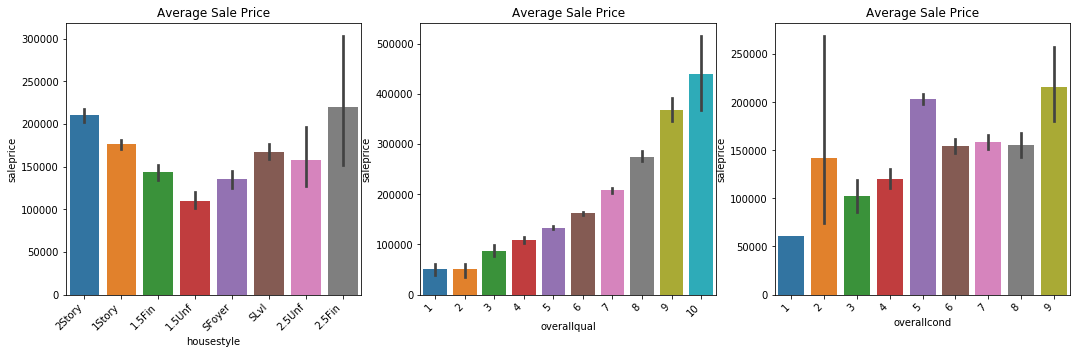

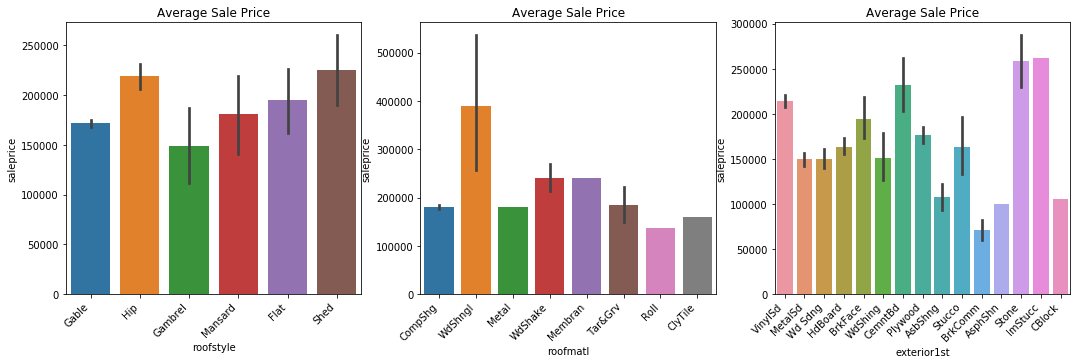

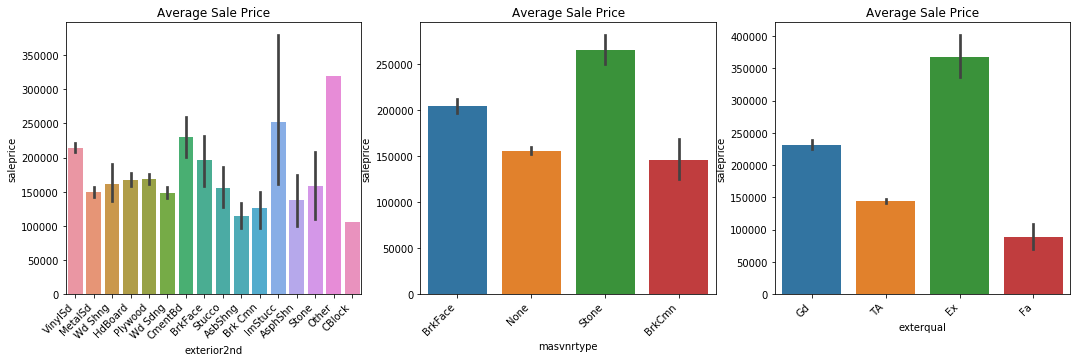

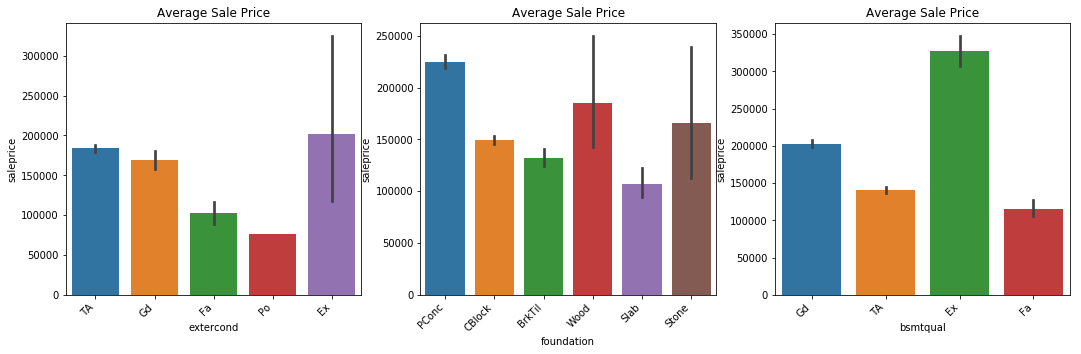

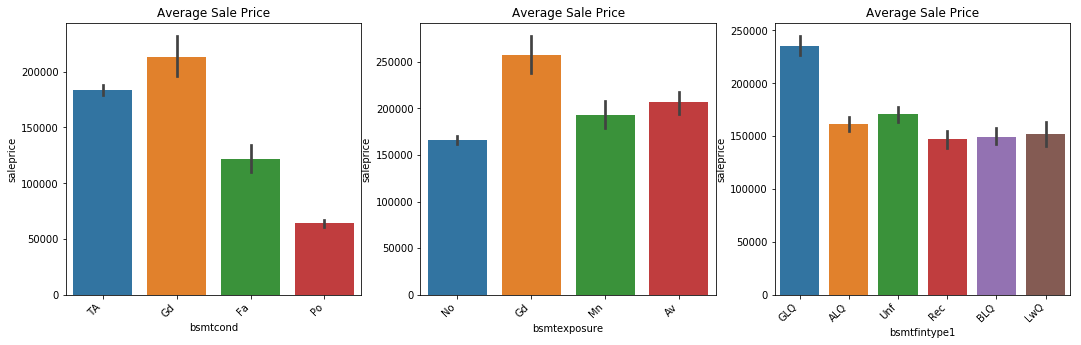

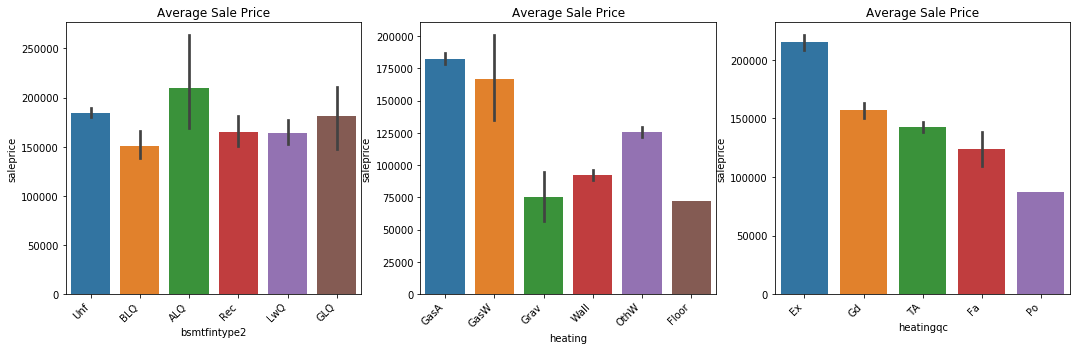

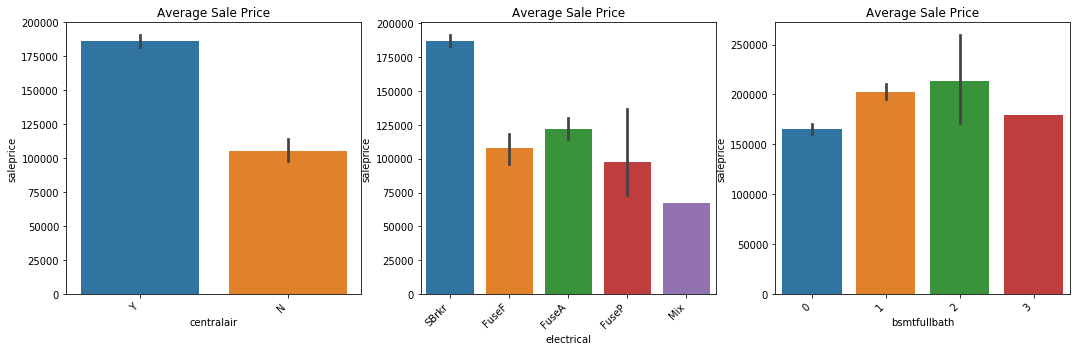

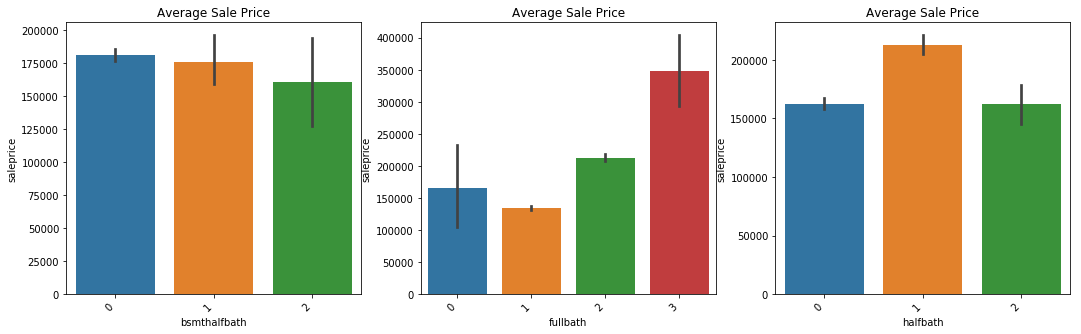

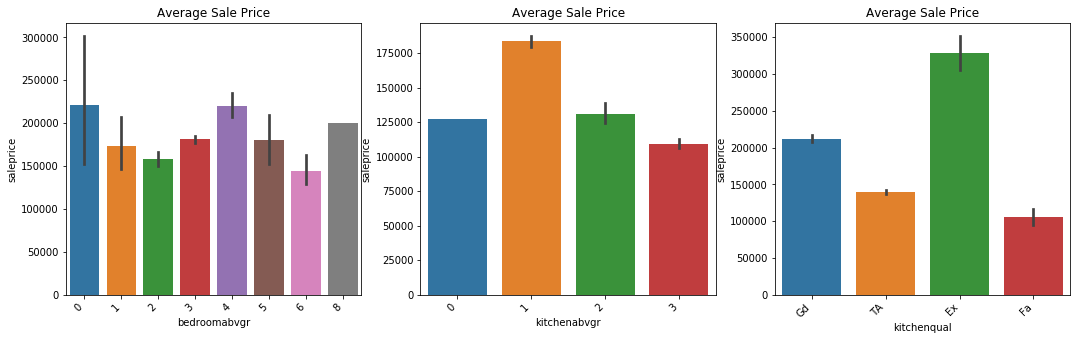

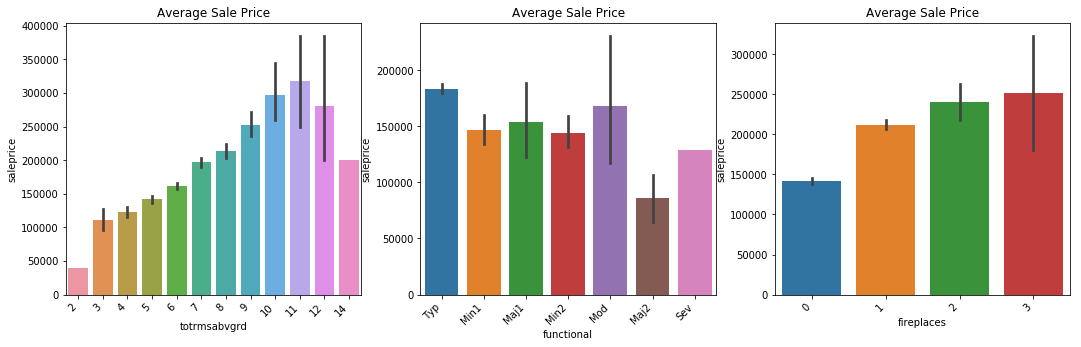

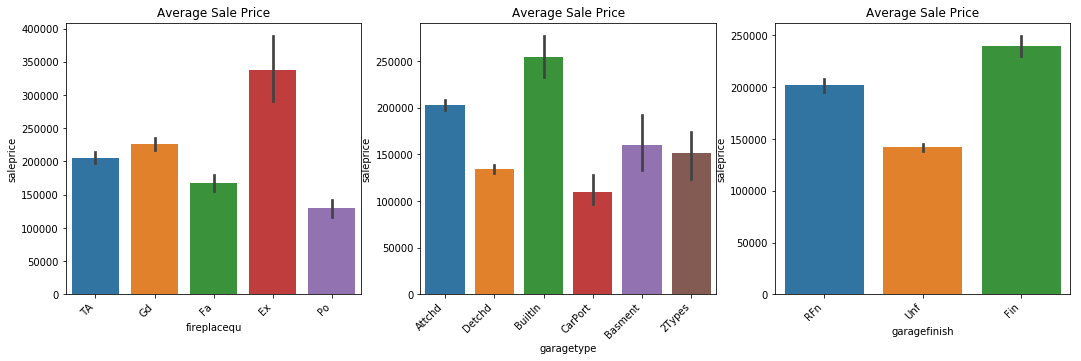

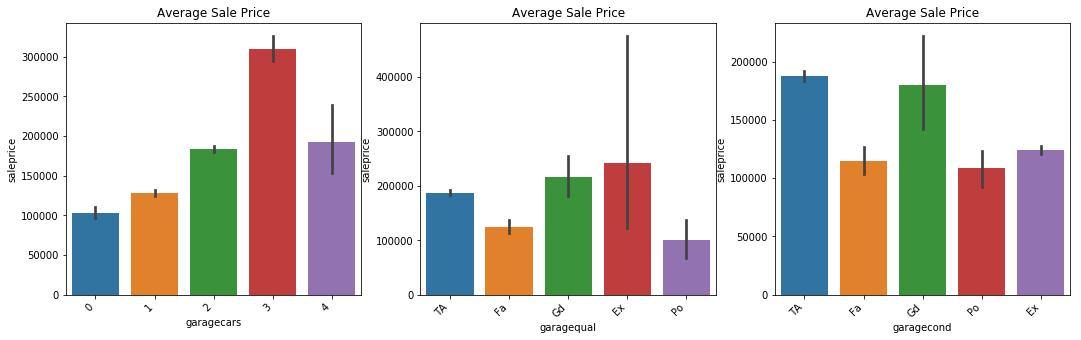

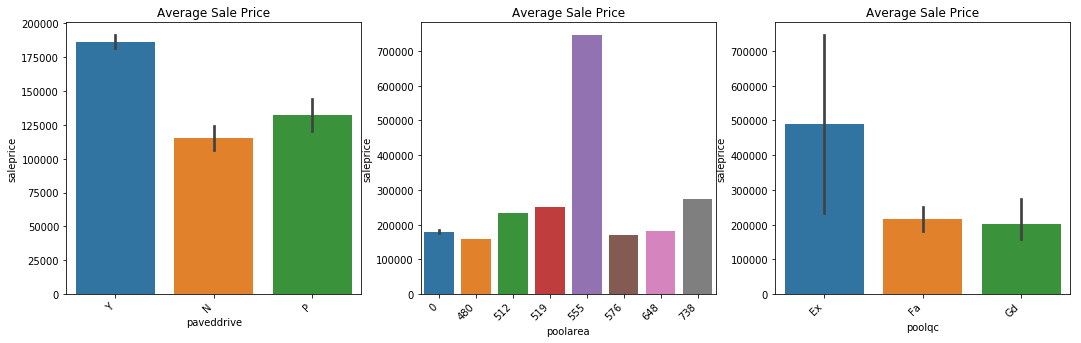

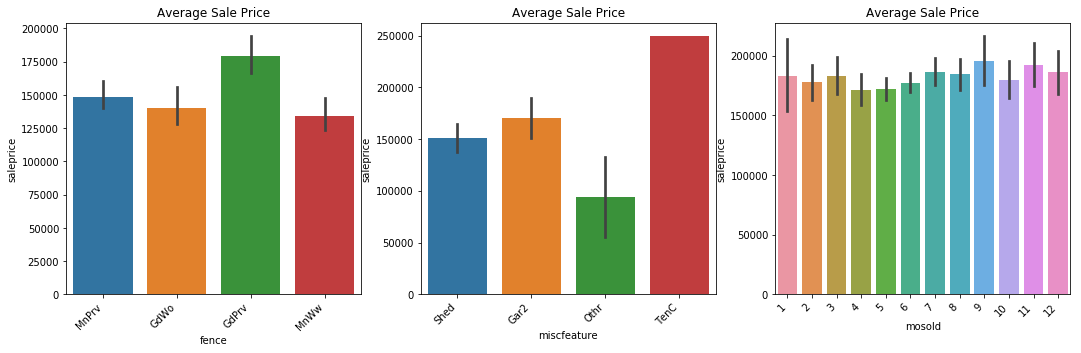

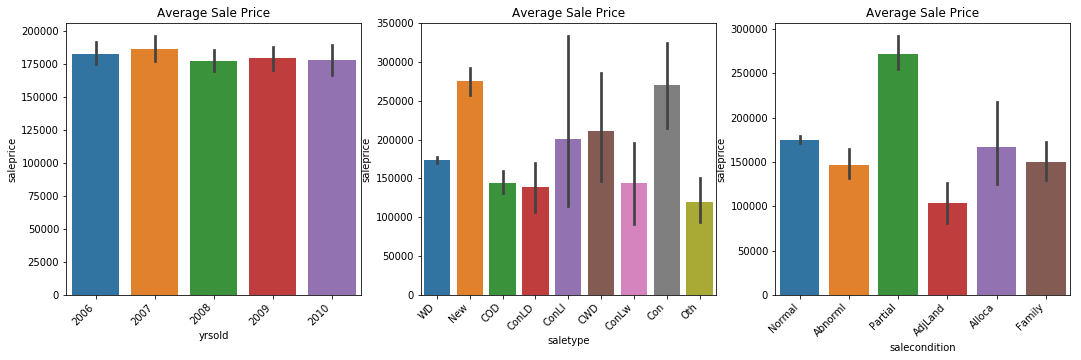

In [265]:
#Creating bar plot to analizes categorical variables

i=0

while i < len(categorical):


    plt.figure(figsize=(18,5))

    plt.subplot(1,3,1)
    # draw the heatmap using seaborn.
    sns.barplot(houses_df[categorical[i]], houses_df['saleprice'])
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('Average Sale Price')

    if i+1 < len(categorical):
        plt.subplot(1,3,2)
        # draw the heatmap using seaborn.
        sns.barplot(houses_df[categorical[i+1]], houses_df['saleprice'])
        plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('Average Sale Price')
        
    if i+2 < len(categorical):

        plt.subplot(1,3,3)
        # draw the heatmap using seaborn.
        sns.barplot(houses_df[categorical[i+2]], houses_df['saleprice'])
        plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('Average Sale Price')
        
    plt.show()

    i+=3


**Based on visualizations above, I'll select categorical variables for the model**


In [266]:
new_categorical=['mssubclass','mszoning','street','lotshape','landcontour','condition2','bldgtype','housestyle',
                 'overallqual','roofstyle','roofmatl','exterior1st','masvnrtype','exterqual','extercond','foundation',
                'bsmtexposure','heating','heatingqc','centralair','electrical','fullbath','kitchenqual','totrmsabvgrd',
                'fireplaces','garagetype','garagefinish','garagecars','garagecond','paveddrive','neighborhood','poolarea']

#Non numeric categorical features list
new_categorical_1=['mszoning','street','lotshape','landcontour','condition2','bldgtype','housestyle',
                 'roofstyle','roofmatl','exterior1st','masvnrtype','exterqual','extercond','foundation',
                'bsmtexposure','heating','heatingqc','centralair','electrical','kitchenqual',
                'garagetype','garagecond','garagefinish','paveddrive','neighborhood']

#Numeric categorical features list
new_categorical_2=['mssubclass','overallqual','fullbath','totrmsabvgrd','fireplaces','garagecars','poolarea']


Column: garageyrblt with 5.5479452054794525% of null values


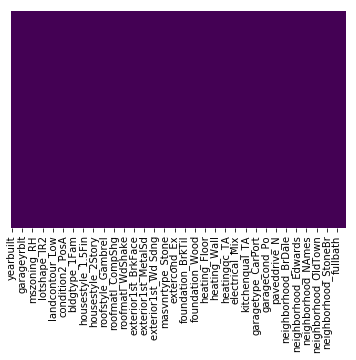

In [267]:
#Get dummies for non numeric categorical variables and adding to dataframe

for varcat in new_categorical_1:
    
    dropFirst = False
    
    if(len(houses_df[varcat].unique()) == 2):
        dropFirst = True
        
    dummy = pd.get_dummies(houses_df[varcat], drop_first=dropFirst)
  
    for column in dummy.columns:
        new_houses[varcat + '_' + column] = dummy[column]


#Adding numerical categorical features to the dataframe

new_houses[new_categorical_2] = houses_df[new_categorical_2]


#Verifying if there are some missing values

nonclean = ((new_houses.isnull().sum()*100)/houses_df.saleprice.count())

for value,index in zip(nonclean,nonclean.index):
    if value > 0:
        print('Column: {} with {}% of null values'.format(index,value))


#Cleaning garageyrblt by replacing missing values in a column with a value from yearremodadd because they are high correlated.

new_houses['garageyrblt'].fillna(new_houses['yearremodadd'], inplace=True)

sns.heatmap(new_houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [269]:
#Creating feature set for X
featureset = list(new_houses.columns)
featureset.remove('saleprice')


### Build Regression Model using these features and estimate the parameters using OLS

In [270]:
# Y is the target variable
Y = new_houses['saleprice']

# X is the feature set which includes
# is_male and is_smoker variables


X = new_houses[featureset]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.51586313e+02  2.61846039e+02  2.66434768e+01 -2.64546080e+01
  7.20370750e+01 -4.98126781e+01  3.33790784e+01 -2.93762851e+04
  2.08475607e+04  3.21930961e+03  5.47328237e+03 -1.63867503e+02
 -1.57950534e+01 -6.97524719e+03  4.60741215e+03  1.02480452e+04
 -7.88021013e+03 -3.63572693e+03  5.09812671e+03 -2.87945803e+03
  1.41705825e+03  1.72104795e+04  3.01994381e+04  3.35385837e+04
  6.12910779e+04 -1.68219964e+05 -2.31936269e+04  1.61487343e+04
  3.30252778e+04  7.40309503e+03  2.11202472e+04 -1.04183449e+04
 -1.27554218e+04 -5.34957559e+03 -1.93295751e+03  1.62638930e+04
  8.01121292e+03 -2.64975879e+04 -7.37172391e+03 -4.96370202e+03
  9.99768933e+03  6.49317609e+03 -1.19212609e+04 -1.00591333e+04
 -2.22041119e+03 -6.11856691e+03 -2.21593193e+03  3.25353042e+04
 -5.27570775e+05  5.99156292e+04  9.10341316e+04  7.71946202e+04
  5.35217393e+04  4.87528817e+04  6.14012548e+04  1.35750518e+05
  9.02778974e+03  5.16553986e+03 -2.71614215e+04  1.62733915e+04
  7.6979

In [271]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     83.95
Date:                Thu, 08 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:57:57   Log-Likelihood:                -16844.
No. Observations:                1460   AIC:                         3.398e+04
Df Residuals:                    1314   BIC:                         3.475e+04
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.355e+05   4.54e+04     -5.191      0.000   -3.25e+05   -1.47e+05
yearbuilt              251.5863     75.990      3.311      0.001     102.512     400.661
yearremodadd           261.8460     57.478      4.556      0.000     149.088     374.604
totalbsmtsf             26.6435      4.716      5.649      0.000      17.391      35.896
firstflrsf             -26.4546      7.376     -3.586      0.000     -40.925     -11.984
grlivarea               72.0371      5.890     12.230      0.000      60.481      83.593
garageyrblt            -49.8127     62.704     -0.794      0.427    -172.823      73.197
garagearea              33.3791      8.648      3.860      0.000      16.414      50.344
mszoning_C (all)     -7.648e+04   1.27e+04     -6.042      0.000   -1.01e+05   -5.16e+04
mszoning_FV          -2.625e+04   1.13e+04     -2.331      0.020   -4.83e+04   -4161.741
mszoning_RH          -4.388e+04    1.1e+04     -3.983      0.000   -6.55e+04   -2.23e+04
mszoning_RL          -4.163e+04   9549.281     -4.359      0.000   -6.04e+04   -2.29e+04
mszoning_RM          -4.726e+04   9939.376     -4.755      0.000   -6.68e+04   -2.78e+04
street_Pave            -15.7951   1.26e+04     -0.001      0.999   -2.47e+04    2.47e+04
lotshape_IR1         -6.585e+04   1.17e+04     -5.639      0.000   -8.88e+04   -4.29e+04
lotshape_IR2         -5.427e+04    1.2e+04     -4.539      0.000   -7.77e+04   -3.08e+04
lotshape_IR3         -4.863e+04   1.35e+04     -3.605      0.000   -7.51e+04   -2.22e+04
lotshape_Reg         -6.676e+04   1.16e+04     -5.754      0.000   -8.95e+04    -4.4e+04
landcontour_Bnk      -6.251e+04   1.17e+04     -5.328      0.000   -8.55e+04   -3.95e+04
landcontour_HLS      -5.378e+04    1.2e+04     -4.467      0.000   -7.74e+04   -3.02e+04
landcontour_Low      -6.176e+04   1.21e+04     -5.113      0.000   -8.55e+04   -3.81e+04
landcontour_Lvl      -5.746e+04   1.15e+04     -4.996      0.000      -8e+04   -3.49e+04
condition2_Artery    -1.223e+04    2.1e+04     -0.582      0.561   -5.35e+04     2.9e+04
condition2_Feedr       761.4111   1.45e+04      0.052      0.958   -2.77e+04    2.92e+04
condition2_Norm       4100.5566   1.05e+04      0.391      0.696   -1.65e+04    2.47e+04
condition2_PosA       3.185e+04   3.18e+04      1.003      0.316   -3.04e+04    9.41e+04
condition2_PosN      -1.977e+05   2.02e+04     -9.793      0.000   -2.37e+05   -1.58e+05
condition2_RRAe      -5.263e+04   3.85e+04     -1.369      0.171   -1.28e+05    2.28e+04
condition2_RRAn      -1.329e+04    2.6e+04     -0.512      0.609   -6.42e+04    3.76e+04
condition2_RRNn       3587.2507   1.99e+04      0.180      0.857   -3.55e+04    4.27e+04
bldgtype_1Fam         -3.97e+04   1.05e+04     -3.766      0.000   -6.04e+04    -1.9e+04
bldgtype_2fmCon      -2.598e+04   1.19e+04     -2.182    

-------------------------------------------------
<font color=gray>
By: Wendy Navarrete
8/8/2019